In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Homework 8


Skipped Exercise 5.9 (c) and 5.10.



---
<center><h1> Exercise 5.5 </h1></center>

---

Let $u(x,t)$  is the solution to the problem above and define the function $v$ as

$$v(x,t) = u(x,t) + \frac{x^3}{3} - \frac{x}{3}$$

We can see that

$$v_{tt} = u_{tt}$$

and

$$v_{xx} = u_{xx} + 2x $$

Therefore, our function $v(x,t)$ satisfies the following conditions

$$v_{tt} = v_{xx} \quad \text{for} \quad x \in (0, 1), \quad t > 0, \\
v(0, t) = v(1, t) = 0, \\
v(x, 0) = f (x) + x^3/3 - x/3 , \quad v_t (x, 0) = g(x)$$

Hence $v$ satisfies the wave equation and has solution

$$v(x,t) = \sum_{k=1}^\infty \sin(k\pi x) \bigg(\alpha_k \cos(k\pi t) + \frac{\beta_k}{k\pi}\sin(k\pi t)\bigg)$$

where $\alpha_k$ and $\beta_k$ are constants such that

$$f(x) + \frac{x^3}{3} + \frac{x}{3} = \sum_{k=1}^\infty \alpha_k \sin(k\pi x) \quad \text{and} \quad g(x) = \sum_{k=1}^\infty \beta_k \sin(k\pi x)
$$

Now let $c_k$ be the coefficients for the Fourier Sine Series of $x/3$ then these coefficients are given by

$$c_k = \int_0^1 \frac{x}{3} \sin(k\pi x) dx = \frac{1}{3} \int_0^1 \! x \sin(k\pi x) dx = \frac{(-1)^{k+1}}{3k\pi}$$

Similarly, let $d_k$ be the coefficients for the Fourier Sine Series of $x^3/3$ then they are given by

$$d_k = \int_0^1 \frac{x^3}{3} \sin(k\pi x)dx = \frac{1}{3} \int_0^1 x^3 \sin(k\pi x) dx = \bigg(\frac{1}{3k\pi} -\frac{2}{(k\pi)^3}\bigg) (-1)^{k+1}$$

Now we assume that $f$ can be expressed as a Fourier Sine Series and let $a_k$ be the coefficients for the Fourier Sine Series of $f$ we can express $\alpha_k$ as

$$\alpha_k = a_k + b_k + c_k = a_k + \frac{(-1)^{k+1}}{3k\pi} + \bigg(\frac{1}{3k\pi} -\frac{2}{(k\pi)^3}\bigg) (-1)^{k+1} = a_k + \bigg(\frac{2}{3k\pi} -\frac{2}{(k\pi)^3}\bigg) (-1)^{k+1}$$

Therefore, our solution $u(x,t)$ is given by 

$$u(x,t) = v(x,t) - \frac{x^3}{3} + \frac{x}{3} =\sum_{k=1}^\infty \sin(k\pi x) \bigg(\big(a_k + \bigg(\frac{2}{3k\pi} -\frac{2}{(k\pi)^3}\bigg) (-1)^{k+1}\big) \cos(k\pi t) + \frac{\beta_k} {k\pi}\sin(k\pi t)\bigg) - \frac{x^3}{3} + \frac{x}{3} $$



---
<center><h1> Exercise 5.6 </h1></center>

---



In [4]:
# For Example 5.1

def f(x):
    return 2.0*np.sin(np.pi*x)

def g(x):
    return -1.0*np.sin(2*np.pi*x)

def u_exact(x,t):
    return 2.0*np.sin(np.pi*x)*np.cos(np.pi*t) - 1.0/(2*np.pi)*np.sin(2*np.pi*x)*np.sin(2*np.pi*t)

1.0
1.0
1.0
1.0
Rates of convergence:  [-1.84046274 -1.35363695 -1.09114789]

Errors:  [  1.11022302e-15   5.99520433e-15   1.53210777e-14   3.26405569e-14]

Rates of convergence:  [ 2.99763113  2.99629601  2.99978642]

Errors:  [  8.18417846e-04   5.24925577e-05   6.57843760e-06   8.22426447e-07]


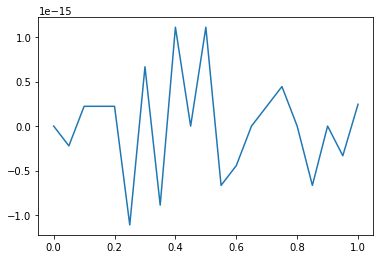

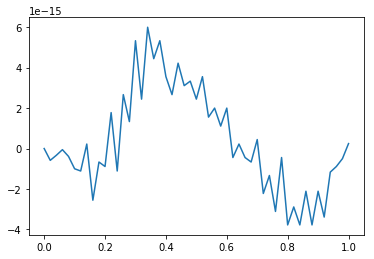

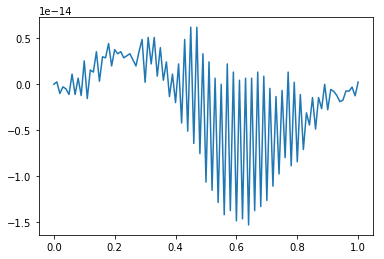

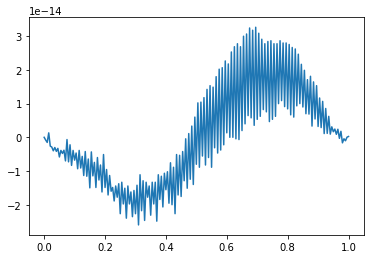

In [5]:
n_s = [19, 49, 99, 199]
errors = np.zeros(4)
errors2 = np.zeros(4)
dt_s = np.zeros(4)
dx_s = np.zeros(4)
count = 0

for n in n_s:
    
    plt.figure(count)
    
    x = np.linspace(0,1,n+2)
    dx = x[1]-x[0]
    dx_s[count] = dx
    
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)    
    A *= 1.0/dx**2

    r = 1.0
    dt = r*dx
    dt_s[count] = dt
    
   
    v_old = np.copy(f(x))
    v_current = np.copy(f(x))
    v_current[1:-1] = v_old[1:-1] + dt*g(x[1:-1]) - dt**2/2*np.dot(A,v_old[1:-1])
    
    errors2[count] = np.max(np.abs(v_current - u_exact(x,dt)))
    
    v_new = 0*x
    
    t = 1.0*dt 

    B = 2.0*np.eye(n)-dt**2*A
    
    time_iter = 0
    
    
    while t<1:
        v_new[1:-1] = np.dot(B,v_current[1:-1]) - v_old[1:-1] 
        v_old = np.copy(v_current) 
        v_current = np.copy(v_new)
        t += dt 
        time_iter += 1
    print (t)    
    errors[count] = np.max(np.abs(v_new-u_exact(x,t)))
    
    plt.plot(x, v_new-u_exact(x,t))
            
    count += 1
    
print
alpha = np.log(errors[1:]/errors[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print ('Rates of convergence: ', alpha)
print()
print ('Errors: ', errors)

print()
alpha = np.log(errors2[1:]/errors2[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print ('Rates of convergence: ', alpha)
print()
print ('Errors: ', errors2)

1.0
1.0
1.0
1.0

Rates of convergence:  [ 0.41368316 -1.93621642 -0.08624844]

Errors:  [  1.04140775e-05   7.12852579e-06   2.72809159e-05   2.89615843e-05]

Rates of convergence:  [ 0.21712419  0.14809018 -1.90755446]

Errors:  [  7.35990421e-06   6.03211705e-06   5.44364975e-06   2.04230822e-05]


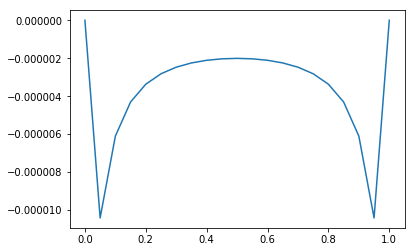

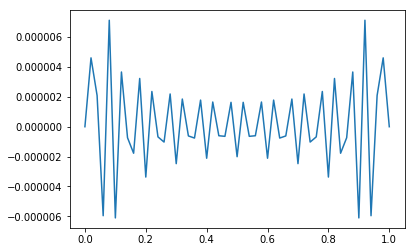

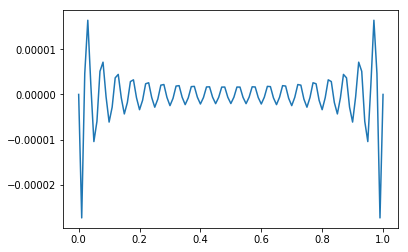

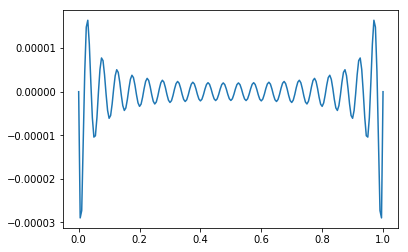

In [8]:
# Explicit Method

def f2(x):
    #    for k in range(1,n):
    #        S_N += 8.0/(np.pi**3*(2*k-1))*np.sin((2*k-1)*np.pi*x)     
    return x*(1-x)

def U2(x,t):
    U_N = np.copy(x)*0
    for k in range(1,21):
        U_N += 8.0/(np.pi**3*(2*k-1)**3)*np.sin((2*k-1)*np.pi*x)*np.cos((2*k-1)*np.pi*t) 
    return U_N

N = [19, 49, 99, 199]
errors = np.zeros(4)
errors2 = np.zeros(4)
dt_s = np.zeros(4)
dx_s = np.zeros(4)
count = 0



for n in N:
        
    plt.figure(count)
    
    x = np.linspace(0,1,n+2)
    dx = x[1]-x[0]
    dx_s[count] = dx
    
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)    
    A *= 1.0/dx**2

    r = 1.0
    dt = r*dx
    dt_s[count] = dt
    
   
    v_old = np.copy((f2(x)))
    v_current = np.copy(f2(x))
    v_current[1:-1] = v_old[1:-1] - dt**2/2*np.dot(A,v_old[1:-1])
    
    errors2[count] = np.max(np.abs(v_current - U2(x,dt)))
    
    v_new = 0*x
    
    t = 1.0*dt

    B = 2.0*np.eye(n)-dt**2*A
    
    time_iter = 0
    while t<1:
        v_new[1:-1] = np.dot(B,v_current[1:-1]) - v_old[1:-1] 
        v_old = np.copy(v_current)
        v_current = np.copy(v_new)
        t += dt 
        time_iter += 1
    print (t)    
    errors[count] = np.max(np.abs(v_new-U2(x,t)))
    
    plt.plot(x, v_new-U2(x,t))
            
    count += 1
    
print()
alpha = np.log(errors[1:]/errors[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print ('Rates of convergence: ', alpha)
print()
print ('Errors: ', errors)

print()
alpha = np.log(errors2[1:]/errors2[0:-1])/np.log(dt_s[1:]/dt_s[0:-1])
print ('Rates of convergence: ', alpha)
print()
print ('Errors: ', errors2)

Our errors are small that we can equate it to roundoff error. 

---
<center><h1> Exercise 5.8 </h1></center>



a)

We impose ansatz to our equation. We then have the following:
    
$$u(x,t) = X(x)T(t)$$

$$X(x)\big(T^{\prime\prime}(t) + T^\prime(t)\big) = X^{\prime\prime}(x)T(t)$$

$$\frac{T^{\prime\prime}(t) + T^\prime(t)}{T(t)} = \frac{X^{\prime\prime}(x)}{X(x)} = -\lambda$$

for some $\lambda \in \mathbb{R}$ since $\frac{T^{\prime\prime}(t) + T^\prime(t)}{T(t)}$ is independent of $x$ and $\frac{X^{\prime\prime}(x)}{X(x)}$ is independent of $t$.

Now we have the eigenvalue problem

$$-X^{\prime\prime}(x) = \lambda X(x), \quad \text{for} \enspace x \in(0,1) \\
X(0) = X(1) = 0$$

And we know the eigenvalues of the problems are given by $\lambda = \lambda_k = (k\pi)^2 \quad \text{for} \quad k = 1,2,\ldots$

with the eigenfunctions $X_k(x) = \sin(k\pi x) \quad \text{for} \quad k = 1,2,\ldots$

So our function $T_k(t)$ must satisfy $T_k^{\prime\prime}(t) + T_k^\prime(t) + (k\pi)^2T_k(t) = 0$

Thus, the general solution is given by 

$$T_k(t) = \alpha_k e^{-t/2}\cos\big(\sqrt{4k^2\pi^2 - 1}t\big) + \beta_k e^{-t/2}\sin\big(\sqrt{4k^2\pi^2 - 1}t\big)$$

where $\alpha_k$ and $\beta_k$ are constants in $\mathbb{R}$

So, we have

$$u_k(x,t) = \sin(k\pi x) \Big(\alpha_k e^{-t/2}\cos\big(\sqrt{4k^2\pi^2 - 1}t\big) + \beta_k e^{-t/2}\sin\big(\sqrt{4k^2\pi^2 - 1}t\big)\Big)$$ 

and the initial conditions

$$u_k(x,0) = \alpha_k\sin(k\pi x)$$

and

$$(u_k)_t(x,0) = \sin(k\pi x) \big( -\frac{1}{2}\alpha_k + \sqrt{4k^2\pi^2 -1}\beta_k \big)$$

Hence, our general solution is of the form

$$u(x,t) = \sum_{k=1}^\infty \sin(k\pi x) \Big(\alpha_k e^{-t/2}\cos\big(\sqrt{4k^2\pi^2 - 1}t\big) + \beta_k e^{-t/2}\sin\big(\sqrt{4k^2\pi^2 - 1}t\big)\Big)$$

We assume that our initial function $f(x)$, and $g(x)$ can be expressed as Fourier Sine Series such as following:

$$f(x) = \sum_{k=1}^\infty a_k\sin(k\pi x) \quad \text{and} \quad g(x) = \sum_{k=1}^\infty b_k\sin(k\pi x)$$

Then, we have 

$$f(x) = u(x,0) \implies \sum_{k=1}^\infty a_k\sin(k\pi x) = \sum_{k=1}^\infty \alpha_k\sin(k\pi x) \implies a_k = \alpha_k$$

and

$$g(x) = u_t(x,0)$$

$$\sum_{k=1}^\infty b_k\sin(k\pi x)=\sum_{k=1}^\infty \sin(k\pi x) \big( -\frac{1}{2}\alpha_k + \sqrt{4k^2\pi^2 -1}\beta_k \big) $$

This implies that

$$\beta_k = \frac{b_k + \frac{1}{2}a_k}{\sqrt{4k^2\pi^2 -1}}$$

Hence, our solution $u(x,t)$ is given by

$$u(x,t) =  \sum_{k=1}^\infty \sin(k\pi x) \Big(a_k e^{-t/2}\cos\big(\sqrt{4k^2\pi^2 - 1}t\big) + \frac{b_k + \frac{1}{2}a_k}{\sqrt{4k^2\pi^2 -1}}e^{-t/2}\sin\big(\sqrt{4k^2\pi^2 - 1}t\big)\Big)$$














b)

We define the energy, $E(t)$ by 

$$E(t) = \int_{0}^{1} (u_x^2(x,t) +u_t^2(x,t))dx.$$

By differentiating E(t) with respect to time we obtain

$$\frac{d}{dt}E(t) = 2\int^1_0 \left( u_xu_{xt} + u_tu_{tt}\right)dx$$

Hence, using integration by parts, we obtain

$$
\begin{eqnarray}
u_xu_{xt} = u_xu_{tx} \\
u_{tx} = dv, \; v = u_t \\
u_x = u, \; du = u_{xx}dx
\end{eqnarray}
$$

Using the initial and boundary conditions, we have the following

$$\frac{d}{dt}E(t) = 2\int^1_0\left(u_tu_{tt} - u_t\left(u_t + u_{tt}\right)\right)dx = -2 \int^1_0 u^2_t dx$$

Since we showed that the derivative of $E(t)$ is strictly negative and thus decreasing for all time, so we have $E(t) \leq E(0)$.

